<a href="https://colab.research.google.com/github/rida-manzoor/ML/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest

Random forest(Bootstrap Aggregation) is bagging technique, it combines the output of multiple decision trees to reach a single result. It can handle both classification and regression problems.

## Intuition

Understanding random forests require a step-by-step approach. Here is a step-by-step guide.

![alt text](https://editor.analyticsvidhya.com/uploads/18195step1.1.png)

**Step 1: How a Complete Training Dataset is  Used to Build Multiple Trees?**

When we have a training dataset. The model creates a bootstrap sample with the replacement.

**Columns:**

1. For classification, it’s a square root of the total number of features

Example: let’s say we have a total of 4 features for each subset we will have

The square root of 4= 2. which is 2 features for each tree.

2. Regression: total number of features and dividing them by 3

**Step 2: Multiple Decision Trees can be Built by Following Steps**
![alt text](https://editor.analyticsvidhya.com/uploads/34243step2.png)

**Step 3: Using Multi-tree Models for Predicting the Outcome, What is the Process of Predicting the Result?**

![alt text](https://editor.analyticsvidhya.com/uploads/92687step%203.png)

Step 4: When a Model Finalizes a Result for Regression or Classification, What is it Called?

![alt text](https://editor.analyticsvidhya.com/uploads/90530step4.1.png)

> For classification, we use majority voting

> For regression, we use averaging

*Source: Analytics Vidhya*

## **Why we do not use all features for each subset of data?**

Random Forest introduces diversity and randomness into its ensemble of decision trees by using only a subset of features at each split in each tree. This serves several purposes:

1. **Decorrelation of Trees:**
   - If every tree in the ensemble had access to all features, they might end up making similar splits, leading to highly correlated trees. The strength of an ensemble comes from having diverse and less correlated models. By using a subset of features at each split, Random Forest introduces variability, and different trees focus on different aspects of the data.

2. **Avoiding Overfitting:**
   - Allowing each tree to consider only a subset of features helps prevent overfitting. If every tree had access to all features, each tree might fit the noise in the data, leading to an overfit model that does not generalize well to new, unseen data. Restricting the features at each split promotes more robust and generalizable models.

3. **Computational Efficiency:**
   - Training decision trees can be computationally expensive, especially with a large number of features. Using a subset of features reduces the computational burden for each tree, making the algorithm more scalable.

4. **Handling Correlated Features:**
   - If there are highly correlated features in the dataset, using all features in every tree might lead to redundant information. By selecting a random subset of features at each split, the algorithm can handle correlated features more effectively.


## Bagging Vs Random Forest

Let's compare Bagging and Random Forest in a table:

| Feature                       | Bagging                                      | Random Forest                                |
|-------------------------------|----------------------------------------------|---------------------------------------------|
| **Base Algorithm**            | Any base learning algorithm                  | Decision Trees (often the default choice)  |
| **Sampling Technique**        | Bootstrap sampling with replacement           | Bootstrap sampling with replacement        |
| **Feature Sampling**          | Typically uses all features                  | Random subset of features at each split     |
| **Diversity of Models**       | Limited diversity among base learners        | Introduces additional randomness to enhance diversity |
| **Correlation of Models**     | Models can be highly correlated              | Reduces correlation through feature subsampling |
| **Out-of-Bag (OOB) Estimate** | Uses out-of-bag samples for validation       | Uses out-of-bag samples for validation      |
| **Handling Overfitting**      | Reduces overfitting compared to individual models | Reduces overfitting through additional randomness and feature subsampling |
| **Computational Efficiency**  | Parallelizable and computationally efficient | Parallelizable, but may be computationally more intensive due to feature subsampling |
| **Typical Use Case**          | Any supervised learning problem               | Especially effective for classification and regression tasks with structured data |
| **Implementation**            | Bagging is a general ensemble method         | Random Forest is a specific type of bagging ensemble using decision trees as base learners |

In summary, both Bagging and Random Forest are ensemble learning techniques that use bootstrap sampling to create diverse subsets for training multiple models. However, Random Forest introduces additional randomness by selecting a random subset of features at each split, aiming to further decorrelate the base learners and enhance the overall performance of the ensemble.

<br><br>
## Hyperparameters

Hyperparameters that are related to random forest are as follow:

**Num_features:**  defines number of decision trees used for training. Default value: 100

**Max_features:**  Defines number of features used by each DT. It has 4 values:



1.   Auto (take sqrt)
2.   sqrt (takes sqrt)
3.   log2 (takes log of number of features)
4.   int (mean exact no. of features)
5.   float(mean % of features)

**Bootstrap:** True or Flase (True means records are sampled with replacement)

**Max_samples:** No. of rows to each decision tree

<br><br>







## **Feature Importance**

Feature importance can be analyzed in two ways. We will discuss both.

**First Way**

1. **Compute Initial Accuracy:**

   Train the model on the original dataset and record the accuracy (e.g., using a validation set).
2. **Shuffle ith Feature:**

  Randomly shuffle the values of the ith feature in the training set, effectively disrupting the relationship between that feature and the target variable.
3. **Compute Shuffled Accuracy:**

   Retrain the model on the dataset with the shuffled ith feature and record the accuracy.
4. **Repeat for All Features:**

   Repeat steps 2-3 for each feature in the dataset.
5. **Calculate Importance:**
   
   Calculate the feature importance as the average change in accuracy across all features:

$
i^{th} featureImportance = \frac{Initial Accuracy - Shuffled Accuracy}{Number of Shuffles}
$

A higher decrease in accuracy indicates that the feature is more important in contributing to the model's predictive performance.

This approach captures the impact of each feature on the model's accuracy, providing insights into their relative importance. Keep in mind that it's computationally expensive, especially if the dataset is large, so you might choose a subset of features for analysis.

<br><br>
**Second way**

The importance of each node in every decision tree is computed individually using the formula:

$ \text{node} = \frac{(N - t)}{N} \left[ \text{impurity} - \frac{(N - t - r)}{(N - t)} \times \text{right_impurity} - \frac{(N - t - L)}{(N - t)} \times \text{left_impurity} \right] $

Here,

\( N \) represents the total number of samples

\( t \) is the number of samples at the current node

\( r \) is the number of samples in the right child

\( L \) is the number of samples in the left child

\(\text{impurity}\), \(\text{right\_impurity}\), and \(\text{left\_impurity}\) are measures of impurity for the node, right child, and left child, respectively.

The overall feature importance is obtained by summing up the feature importance values for all features. However, it's essential to note that this aggregated measure can be misleading for features with high cardinality. To address this issue, the `permutation_importance` class from the `sklearn` library is commonly employed. This class provides a more robust approach to assessing feature importance, particularly in scenarios involving high cardinality features.

The formula calculates the overall node importance by combining the impurity at the current node with the weighted contributions of its left and right children. A higher node importance value indicates that the node is crucial in making decisions, and its split contributes significantly to reducing impurity.

## Why we use Random Forest if we have decision trees?


Random Forests are used instead of individual decision trees because:

1. **Reduced Overfitting:** Random Forests mitigate overfitting by constructing
multiple decision trees on random subsets of the data, reducing the risk of capturing noise.

2. **Improved Generalization**: Ensembling decision trees leads to a more robust and generalized model, as it leverages the collective wisdom of multiple trees, reducing the impact of individual tree idiosyncrasies.

3. **Feature Importance:** Random Forests provide a more accurate measure of feature importance by considering the average impurity reduction across all trees, offering a more reliable assessment of variable contributions.






4. **Handling Large Datasets:** Random Forests handle large datasets efficiently and can be parallelized, making them suitable for high-dimensional and big data scenarios.

5. **Automatic Variable Selection:** They inherently perform feature selection by considering random subsets of features for each split, enhancing model performance.

## Out of Bag(OOB) Problem

The process entails randomly drawing, with replacement, subsets of both rows (denoted as *d'*) and features (denoted as m') from the original dataset for constructing each base model.

Statistically, this resampling procedure leads to the occurrence of out-of-bag (OOB) records. OOB records are instances within the dataset that have not been included in the training set of a particular base model due to the sampling with replacement. Consequently, these OOB records serve as a unique and untouched subset that can be leveraged for assessing the predictive performance of the ensemble model.


### OOB Score

The excluded portion, constituting approximately one-third of the entire dataset, is referred to as the OOB set. The OOB set serves as a validation dataset for assessing the model's predictive performance.

Mathematically, if '*d*' represents the total number of records in the dataset, during the resampling with replacement process, approximately two-thirds (2/3 * d) of the data are included in the training set for constructing each base model. The remaining one-third (1/3 * d) constitutes the OOB set.

 The accuracy achieved on this OOB set is termed the **OOB-Score**, providing an estimate of the model's predictive capability on unseen data.

This process ensures a robust evaluation of the ensemble model's performance and contributes to its ability to generalize well to new, unseen data.

## Decision Tree vs Random Forest


Features   | Decision Trees     | Random Forest
-----------|--------------------|------------------
  **Type** | Single Tree        | Multiple Trees
**Training Data**| Entire Dataset| Random subsets (bootstrapped samples) of the dataset
**Variability** | Sensitive to variations in training data | Reduces overfitting by averaging predictions from multiple trees
**Predictions** | Prone to overfitting and may not generalize well | Generally more robust and better at generalization
**Model Complexity** | Can become highly complex and capture noise in the data | Tends to be more robust due to averaging across trees
**Feature Importance** | Provides feature importance based on impurity reduction | Provides feature importance based on average impurity reduction across trees
**Interpretability** | Generally more interpretable	|Less interpretable due to multiple trees and randomness
**Handling Missing Data** | May struggle with missing data | Can handle missing data by averaging over multiple trees
**Outliers** |Sensitive to outliers | More robust to outliers due to averaging
**Computations** | A single decision tree is faster in computation. | It is comparatively slower.

---

## Classification Problem

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [6]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)

df['target'] = data.target

df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [13]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [14]:
x = data.data
y = data.target

In [15]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [17]:
rf = RandomForestClassifier()

In [18]:
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [19]:
y_pred = rf.predict(X_test_scaled)

In [20]:
accuracy_score(y_test,y_pred)

0.9649122807017544

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[40  3]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## Regression Problem

In [22]:
from sklearn.datasets import fetch_california_housing
cal_housing = fetch_california_housing()
X, y = cal_housing.data, cal_housing.target

In [24]:
df = pd.DataFrame(data=cal_housing.data, columns=cal_housing.feature_names)
df['target'] = cal_housing.target

df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [28]:
print(cal_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [30]:
x_train,x_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [35]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [36]:
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [37]:
y_pred = rf_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.255169737347244


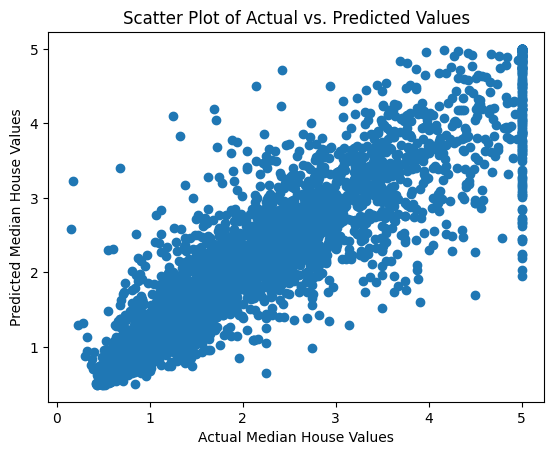

In [38]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Median House Values")
plt.ylabel("Predicted Median House Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.show()

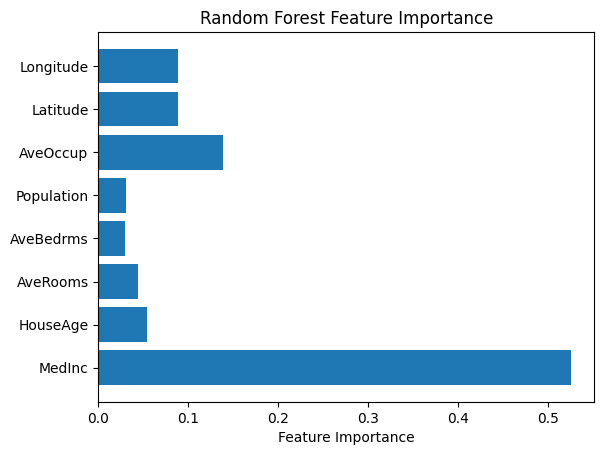

In [41]:
feature_importance = rf_model.feature_importances_
feature_names = cal_housing.feature_names

plt.barh(feature_names, feature_importance)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

## Hyperparameter Tuning

In [ ]:
## Hyperparameter tuning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/heaart.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.shape

(299, 13)

In [ ]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [ ]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(239, 12) (60, 12) (239,) (60,)


In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.7166666666666667

In [ ]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(RandomForestClassifier(), x,y, cv=10, scoring='accuracy'))

0.7722988505747127

In [ ]:
n_estimator = [20,40,60,100,120]
max_feature = [0.2,0.4,0.6,0.7]
max_depth = [2,4,7,None]
max_sample = [0.2, 0.5,0.75,1]

In [ ]:
param_grid = {
    'n_estimators': n_estimator,
    'max_features': max_feature,
    'max_depth': max_depth,
    'max_samples': max_sample
}

In [ ]:
print(param_grid)

{'n_estimators': [20, 40, 60, 100, 120], 'max_features': [0.2, 0.4, 0.6, 0.7], 'max_depth': [2, 4, 7, None], 'max_samples': [0.2, 0.5, 0.75, 1]}


In [ ]:
rf = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(
    estimator=rf,
    param_grid = param_grid,
    cv = 10,
    verbose =2
)

In [ ]:
rf_grid.fit(x_train,y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits
[CV] END max_depth=2, max_features=0.2, max_samples=0.2, n_estimators=20; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.2, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=0.2, max_samples=0.2, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=0.2, max_samples=0.2, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=0.2, max_samples=0.2, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=0.2, max_samples=0.2, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=0.2, max_samples=0.2, n_estimators=20; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.2, n_estimators=20; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.2, n_estimators=20; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.2, n_estimators=20; total time=   0.1s
[CV] 

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 7, None],
                         'max_features': [0.2, 0.4, 0.6, 0.7],
                         'max_samples': [0.2, 0.5, 0.75, 1],
                         'n_estimators': [20, 40, 60, 100, 120]},
             verbose=2)

In [ ]:
rf_grid.best_params_

{'max_depth': 4, 'max_features': 0.4, 'max_samples': 0.5, 'n_estimators': 20}

In [ ]:
rf_grid.best_score_

0.8871376811594203

In [ ]:
rf = RandomForestClassifier(max_depth=4,
                            max_features = 0.4,
                            max_samples = 0.5,
                            n_estimators = 20)

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, max_features=0.4, max_samples=0.5,
                       n_estimators=20)

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
accuracy_score(y_pred,y_test)

0.7666666666666667